# 支持向量机

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wh_data = pd.read_csv('../AQI_maincity/武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data.drop(wh_data[wh_data['质量等级']=='无'].index, inplace=True)
wh_data.head()

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h
date,,,,,,,,
2014-01-01,203,重度污染,153,210,70,2.0,106,55
2014-01-02,231,重度污染,181,254,89,2.4,112,26
2014-01-03,224,重度污染,174,226,63,1.7,84,55
2014-01-04,147,轻度污染,112,184,73,1.6,87,40
2014-01-05,195,中度污染,147,213,89,2.2,91,53


In [3]:
def get_grade(aqi):
    if aqi <= 100:
        return 1
    else:
        return -1

In [4]:
wh_data['GRADE'] = wh_data.AQI.apply(get_grade)
wh_data.dropna(inplace=True)
wh_data.groupby('GRADE').count().AQI

GRADE
-1     689
 1    1125
Name: AQI, dtype: int64

In [5]:
X = wh_data.iloc[:, 2:4]
y = wh_data.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [7]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train_sca = standardscaler.transform(X_train)
X_test_sca = standardscaler.transform(X_test)

d:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
d:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


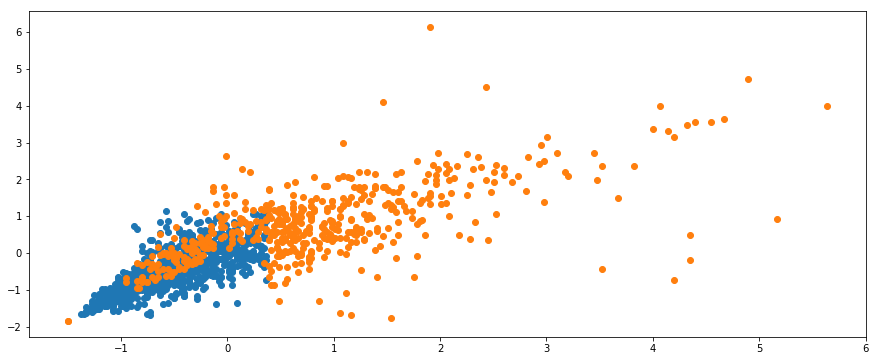

In [8]:
plt.figure(figsize=(15,6))
plt.scatter(X_train_sca[y_train==1][:,0], X_train_sca[y_train==1][:,1])
plt.scatter(X_train_sca[y_train==-1][:,0], X_train_sca[y_train==-1][:,1])
plt.show()

In [9]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train_sca, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
svc.score(X_test_sca, y_test)

0.8964757709251101

**决策边界**

In [11]:
def plot_decision_boundary(model, axis):
    X0, X1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X = np.c_[X0.ravel(), X1.ravel()]
    Y = model.predict(X).reshape(X0.shape)
    
    plt.contourf(X0, X1, Y)

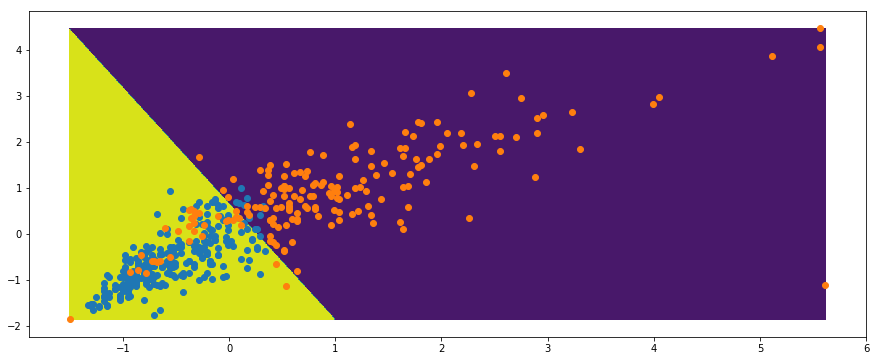

In [12]:
plt.figure(figsize=(15,6))
plot_decision_boundary(svc, axis=[np.min(X_test_sca[:,0]),np.max(X_test_sca[:,0]), np.min(X_test_sca[:,1]),np.max(X_test_sca[:,1])])
plt.scatter(X_test_sca[y_test==1][:,0], X_test_sca[y_test==1][:,1])
plt.scatter(X_test_sca[y_test==-1][:,0], X_test_sca[y_test==-1][:,1])
plt.show()

**非线性划分**

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

In [14]:
svc = RBFKernelSVC()
svc.fit(X_train_sca, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [15]:
svc.score(X_test_sca, y_test)

0.9008810572687225

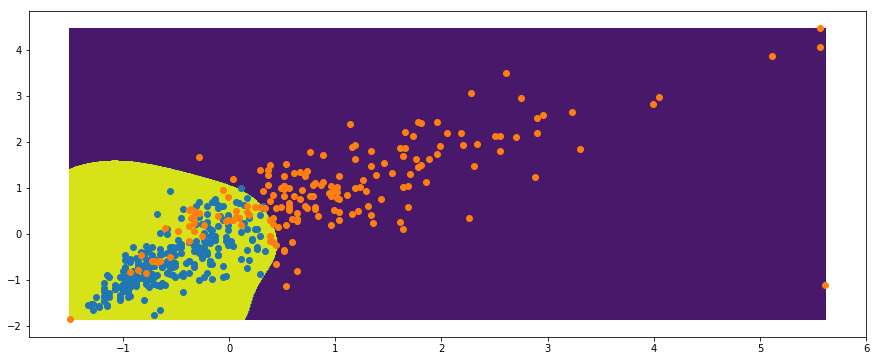

In [16]:
plt.figure(figsize=(15,6))
plot_decision_boundary(svc, axis=[np.min(X_test_sca[:,0]),np.max(X_test_sca[:,0]), np.min(X_test_sca[:,1]),np.max(X_test_sca[:,1])])
plt.scatter(X_test_sca[y_test==1][:,0], X_test_sca[y_test==1][:,1])
plt.scatter(X_test_sca[y_test==-1][:,0], X_test_sca[y_test==-1][:,1])
plt.show()